In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset
data = pd.read_csv('new_data1.csv')

# Drop the 'date' column as it's not required
data = data.drop(['date(dd/mm/yy)'], axis=1)

# Separate features and target
X = data.drop(['HYB'], axis=1)  # Features
y = data['HYB']  # Target variable

# Preprocessing for numerical features
numerical_features = [col for col in X.columns if 'Temperature' in col or 'Wind_Speed' in col or 'Distance_travelled' in col]

# Preprocessing for categorical features
categorical_features = [col for col in X.columns if 'weather_code' in col]

# Create preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),  # Scale numerical features
        ('cat', OneHotEncoder(), categorical_features)  # One-hot encode categorical features
    ])

# Linear Regression model pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression())])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the model
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R2 Score: {r2}")


MAE: 35.34337542808219
MSE: 2115.4843660119463
R2 Score: -1.2861562937604742


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset
data = pd.read_csv('new_data1.csv')

# Drop the 'date' column as it's not required
data = data.drop(['date(dd/mm/yy)'], axis=1)

# Feature Engineering: Adding Aggregated Features
data['total_delay'] = data[['VSKP', 'YLM', 'ANV', 'SLO', 'NDD', 'BZA', 'WL', 'KZJ', 'SC']].sum(axis=1)
data['mean_temperature'] = data[['Temperature_1', 'Temperature_2', 'Temperature_3', 
                                 'Temperature_4', 'Temperature_5', 'Temperature_6', 
                                 'Temperature_7', 'Temperature_8', 'Temperature_9', 
                                 'Temperature_10']].mean(axis=1)
data['mean_wind_speed'] = data[['Wind_Speed_1', 'Wind_Speed_2', 'Wind_Speed_3', 
                                'Wind_Speed_4', 'Wind_Speed_5', 'Wind_Speed_6', 
                                'Wind_Speed_7', 'Wind_Speed_8', 'Wind_Speed_9', 
                                'Wind_Speed_10']].mean(axis=1)

# Separate features and target
X = data.drop(['HYB'], axis=1)
y = data['HYB']

# Preprocessing for numerical features
numerical_features = [col for col in X.columns if 'Temperature' in col or 'Wind_Speed' in col or 'Distance_travelled' in col or col in ['total_delay', 'mean_temperature', 'mean_wind_speed']]

# Preprocessing for categorical features
categorical_features = [col for col in X.columns if 'weather_code' in col]

# Create preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),  # Scale numerical features
        ('cat', OneHotEncoder(), categorical_features)  # One-hot encode categorical features
    ])

# Define the model pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression())])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R2 Score: {r2}")

# Cross-validation to get a more reliable estimate of model performance
cross_val_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print(f"Cross-validated R2 scores: {cross_val_scores}")
print(f"Average R2 Score from Cross-validation: {cross_val_scores.mean()}")


MAE: 32.17956710188356
MSE: 1669.654465257305
R2 Score: -0.8043579642940795
Cross-validated R2 scores: [-1.43125795 -0.13665817 -0.54877281 -0.33397504 -4.07676502]
Average R2 Score from Cross-validation: -1.3054857986662165


Missing values in each column:
VSKP                     0
Temperature_1            0
Wind_Speed_1             0
weather_code_1           0
Distance_travelled_1     0
YLM                      0
Temperature_2            0
Wind_Speed_2             0
weather_code_2           0
Distance_travelled_2     0
ANV                      0
Temperature_3            0
Wind_Speed_3             0
weather_code_3           0
Distance_travelled_3     0
SLO                      0
Temperature_4            0
Wind_Speed_4             0
weather_code_4           0
Distance_travelled_4     0
NDD                      0
Temperature_5            0
Wind_Speed_5             0
weather_code_5           0
Distance_travelled_5     0
BZA                      2
Temperature_6            0
Wind_Speed_6             0
weather_code_6           0
Distance_travelled_6     0
WL                       0
Temperature_7            0
Wind_Speed_7             0
weather_code_7           0
Distance_travelled_7     0
KZJ                     

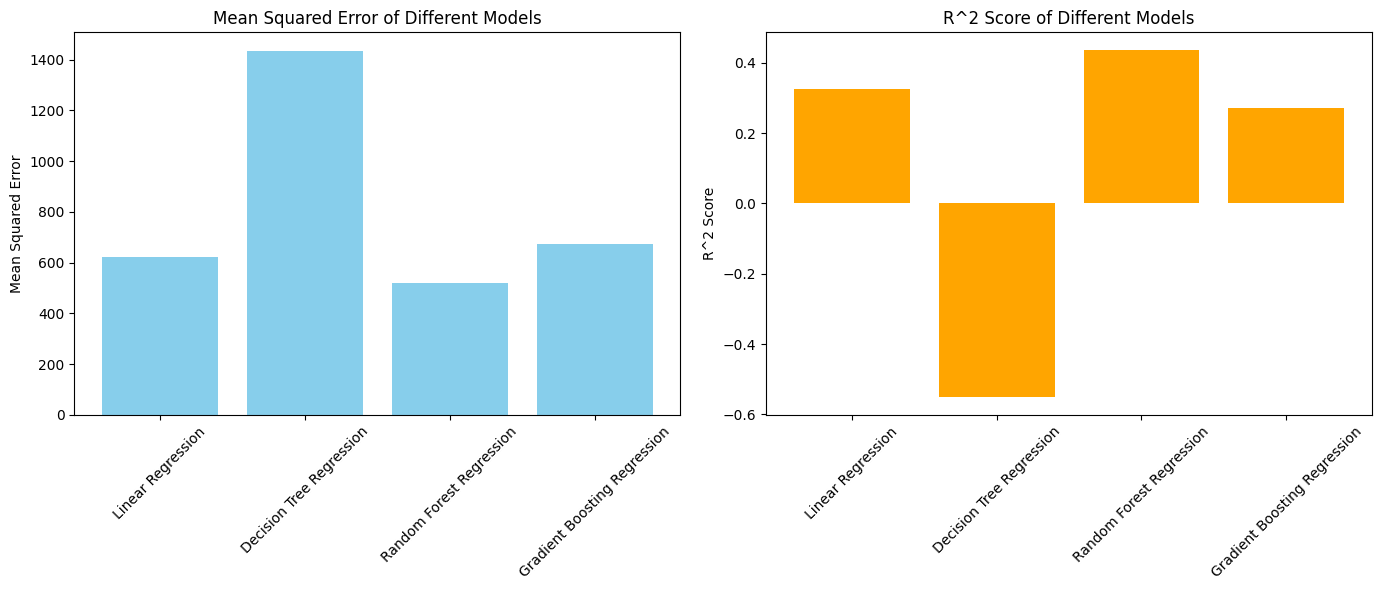

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('new_data1.csv')

# Drop the date column as it is not required
data = data.drop(columns=['date(dd/mm/yy)'])

# Check for missing values
print("Missing values in each column:")
print(data.isnull().sum())

# Handle missing values (impute with mean)
data.fillna(data.mean(), inplace=True)  # Impute with mean (you can also use median or other strategies)

# Alternatively, if you want to drop rows with missing values, you can use:
# data.dropna(inplace=True)

# Separate features and target
X = data.drop(columns=['HYB'])  # Features (all columns except HYB)
y = data['HYB']  # Target (delay at HYB)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Dictionary to store models and results
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regression": DecisionTreeRegressor(random_state=42),
    "Random Forest Regression": RandomForestRegressor(random_state=42),
    "Gradient Boosting Regression": GradientBoostingRegressor(random_state=42)
}

results = {}

# Train and evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    # Predict on test set
    y_pred = model.predict(X_test)
    # Calculate performance metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[model_name] = {
        "Mean Squared Error": mse,
        "R^2 Score": r2
    }
    print(f"{model_name} - Mean Squared Error: {mse}, R^2 Score: {r2}")

# Visualize the results
model_names = list(results.keys())
mse_scores = [results[name]['Mean Squared Error'] for name in model_names]
r2_scores = [results[name]['R^2 Score'] for name in model_names]

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.bar(model_names, mse_scores, color='skyblue')
plt.title('Mean Squared Error of Different Models')
plt.ylabel('Mean Squared Error')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
plt.bar(model_names, r2_scores, color='orange')
plt.title('R^2 Score of Different Models')
plt.ylabel('R^2 Score')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Load the data
data = pd.read_csv('new_data1.csv')
data.drop(columns=['date(dd/mm/yy)'], inplace=True)

# Handle missing values by filling them with the mean
data.fillna(data.mean(), inplace=True)

# Separate features and target
X = data.drop(columns=['HYB'])
y = data['HYB']

# Preprocessing for numerical features
numerical_features = [col for col in X.columns if 'Temperature' in col or 'Wind_Speed' in col or 'Distance_travelled' in col or col in ['total_delay', 'mean_temperature', 'mean_wind_speed']]

# Preprocessing for categorical features
categorical_features = [col for col in X.columns if 'weather_code' in col]

# Create preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),  # Scale numerical features
        ('cat', OneHotEncoder(), categorical_features)  # One-hot encode categorical features
    ])

# Create a pipeline with scaling and model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor())
])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define hyperparameters for tuning
param_grid = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [None, 10, 20],
    'model__min_samples_split': [2, 5, 10],
}

# Grid search for best parameters
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_

# Predictions
y_pred = best_model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Best Model - Mean Squared Error: {mse:.4f}, R^2 Score: {r2:.4f}")

# Check feature importances if using tree-based models
importances = best_model.named_steps['model'].feature_importances_
# Get feature names after preprocessing
num_feature_names = numerical_features
cat_feature_names = best_model.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(categorical_features)

# Combine feature names
all_feature_names = np.concatenate([num_feature_names, cat_feature_names])
importance_df = pd.DataFrame({'Feature': all_feature_names, 'Importance': importances})
importance_df.sort_values(by='Importance', ascending=False, inplace=True)
print(importance_df)


Best Model - Mean Squared Error: 740.5023, R^2 Score: 0.1998
                 Feature  Importance
1           Wind_Speed_1    0.080185
66     weather_code_4_55    0.053300
19          Wind_Speed_7    0.042410
10          Wind_Speed_4    0.039134
41      weather_code_2_1    0.038436
..                   ...         ...
11  Distance_travelled_4    0.000000
23  Distance_travelled_8    0.000000
17  Distance_travelled_6    0.000000
20  Distance_travelled_7    0.000000
14  Distance_travelled_5    0.000000

[130 rows x 2 columns]
